In [28]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Data loading
file_path = Path("data.csv")
df = pd.read_csv(file_path)
df.head(10)

NameError: name 'Path' is not defined

In [30]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
Expenses                 int64
Total_Purchases          int64
dtype: o

In [31]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [32]:
# feature creation

# Day, day of week, week, and month for last visit
df['ShoppingDay_month'] = df['Dt_Customer'].dt.month
df['ShoppingDay_day'] = df['Dt_Customer'].dt.day
df['ShoppingDay_dayofweek'] = df['Dt_Customer'].dt.dayofweek

# Customer for _ days
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

#Total children in house
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Family_Size"] = df["Marital_Status"].replace({"Widow": 1, "Married":2, "Single":1,"Together":2, "Divorced": 1})+ df["Children"]
df

#Feature showing if customer is a parent or not
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

# Creating simpler feature for education
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Dropping data
df = df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID"], axis=1)

#Creating feature for Campaigns accepted total
df['TotalCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

#Creating feature for purchases made for all avenues
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [33]:
# Converting education to string based on type of education
df['Education'].value_counts()
df['Education'] = df['Education'].str.replace('Undergraduate','1')
df['Education'] = df['Education'].str.replace('Graduate','2')
df['Education'] = df['Education'].str.replace('Postgraduate','3')
df['Education'] = df['Education'].astype(str).astype(int)

In [34]:
# Removing columns used to create features
del_col = ["Total_Purchases", "Children", "AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df = df.drop(columns=del_col,axis=1)

In [35]:
data = df.copy()
data

,Year_Birth,Education,Income,Recency,Complain,Response,Age,Expenses,ShoppingDay_month,ShoppingDay_day,ShoppingDay_dayofweek,Customer_For,Family_Size,Is_Parent,TotalCmp,NumTotalPurchases
0,1957,2,58138.0,58,0,1,64,1617,4,9,0,83894400000000000,1,0,0,25
1,1954,2,46344.0,38,0,0,67,27,8,3,6,10800000000000000,3,1,0,6
2,1965,2,71613.0,26,0,0,56,776,8,21,2,40780800000000000,2,0,0,21
3,1984,2,26646.0,26,0,0,37,53,10,2,3,5616000000000000,3,1,0,8
4,1981,3,58293.0,94,0,0,40,422,1,19,6,27734400000000000,3,1,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1967,2,61223.0,46,0,0,54,1341,6,13,3,46742400000000000,3,1,0,18
2212,1946,3,64014.0,56,0,0,75,444,10,6,0,5270400000000000,5,1,1,22
2213,1981,2,56981.0,91,0,0,40,1241,1,25,5,27216000000000000,1,0,1,19
2214,1956,3,69245.0,8,0,0,65,843,1,24,4,27302400000000000,3,1,0,23


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns= data.columns )

In [37]:
scaled_data.head()

,Year_Birth,Education,Income,Recency,Complain,Response,Age,Expenses,ShoppingDay_month,ShoppingDay_day,ShoppingDay_dayofweek,Customer_For,Family_Size,Is_Parent,TotalCmp,NumTotalPurchases
0,-0.986443,-0.409776,0.234063,0.310532,-0.097812,2.377952,0.986443,1.675488,-0.717346,-0.747677,-1.503185,1.974875,-1.758673,-1.581389,-0.439265,1.319446
1,-1.236801,-0.409776,-0.234559,-0.380509,-0.097812,-0.420530,1.236801,-0.962358,0.422589,-1.427226,1.482526,-1.665141,0.450009,0.632356,-0.439265,-1.157987
2,-0.318822,-0.409776,0.769478,-0.795134,-0.097812,-0.420530,0.318822,0.280250,0.422589,0.611420,-0.507948,-0.172132,-0.654332,-1.581389,-0.439265,0.797881
3,1.266777,-0.409776,-1.017239,-0.795134,-0.097812,-0.420530,-1.266777,-0.919224,0.992556,-1.540484,-0.010330,-1.923298,0.450009,0.632356,-0.439265,-0.897205
4,1.016420,1.124115,0.240221,1.554407,-0.097812,-0.420530,-1.016420,-0.307044,-1.572298,0.384904,1.482526,-0.821827,0.450009,0.632356,-0.439265,0.537099


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_df = pd.DataFrame(pca.transform(scaled_data), columns=(["1","2","3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,2216.0,-6.462941e-18,1.822868,-2.851053,-1.553766,-0.331924,1.220675,8.450866
2,2216.0,-1.813631e-17,1.457907,-4.327585,-0.972468,0.014685,1.065044,7.696917
3,2216.0,-6.513041e-17,1.115457,-2.868218,-0.744944,-0.077008,0.630210,3.895456


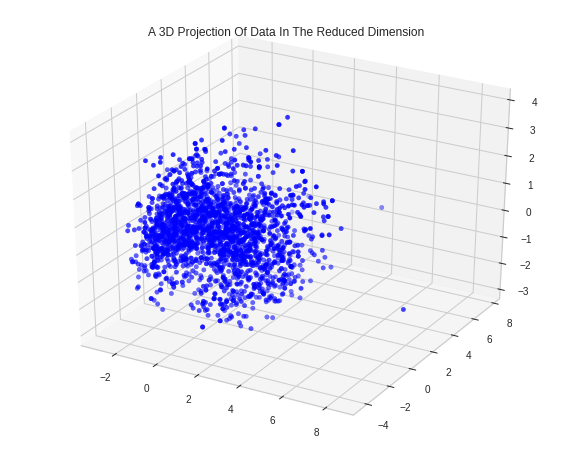

In [39]:
x =PCA_df["1"]
y =PCA_df["2"]
z =PCA_df["3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [99]:
from sklearn.cluster import KMeans

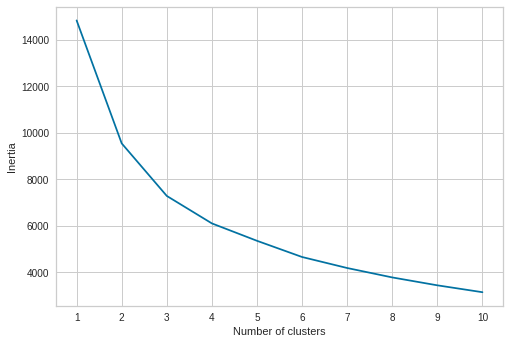

In [41]:

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=13)
    km.fit(PCA_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

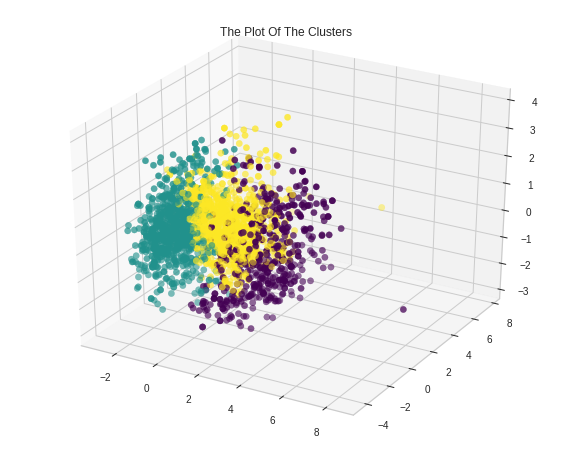

In [50]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("Cluster 3D Plot")
plt.show()

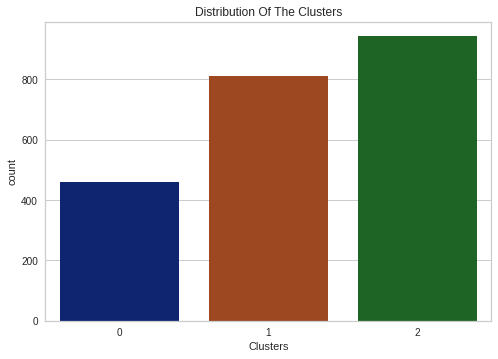

In [57]:
#Plotting countplot of clusters
pl = sns.countplot(x=data["Clusters"], palette= 'dark')
pl.set_title("Cluster Counts")
plt.show()

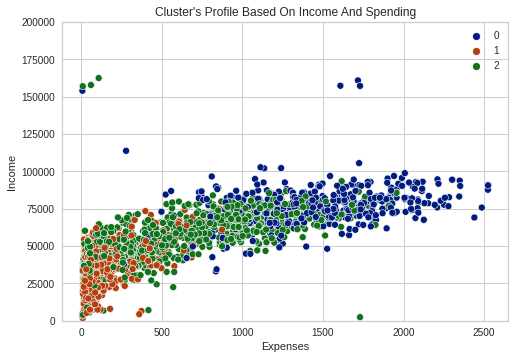

In [60]:
pl = sns.scatterplot(data = data,x=data["Expenses"], y=data["Income"],hue=data["Clusters"], palette= "dark")
pl.set_title("Income and Expenses Clustering")
plt.legend()
plt.ylim([0, 200000])
plt.show()